AUC: 0.79
Accuracy: 0.94


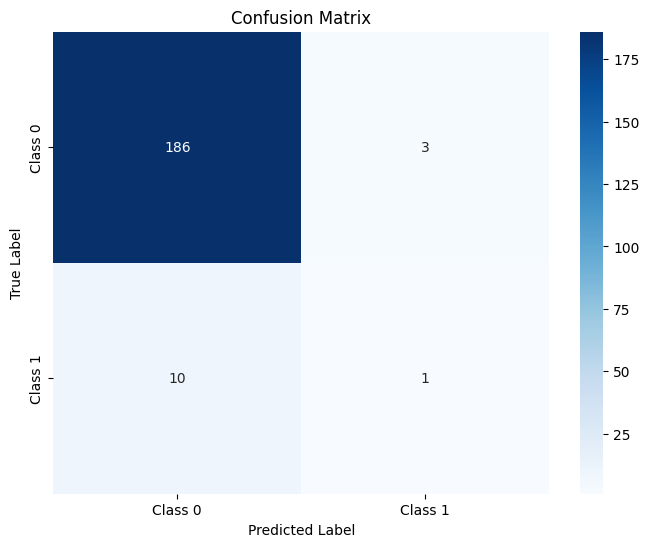

In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 生成一个二分类数据集
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.95, 0.05], random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建一个逻辑回归模型
model = LogisticRegression()

# 训练模型
model.fit(X_train, y_train)

# 预测测试集的概率
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 计算AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc:.2f}")

# 预测测试集的类别
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)


# 绘制混淆矩阵图
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



In [3]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix

# # 生成一个极度不平衡的武侠数据集
# # 假设特征表示武功修炼时间、战斗胜率等，标签表示是否为高手
# X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.95, 0.05], random_state=42)

# # 将数据集分为训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # 创建一个总是预测普通弟子的模型

# def predict(X):
#     return np.zeros(X.shape[0])

# # 训练和预测

# y_pred = predict(X_test)

# # 计算混淆矩阵和准确率
# cm = confusion_matrix(y_test, y_pred)
# accuracy = accuracy_score(y_test, y_pred)

# # 计算 ROC 曲线和 AUC
# # 在这里我们需要一个概率预测来计算 ROC 曲线和 AUC，为了演示，我们假设模型输出的是一个常量概率
# y_pred_prob = np.zeros(X_test.shape[0])
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# auc = roc_auc_score(y_test, y_pred_prob)

# # 可视化结果
# plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
# plt.title("混淆矩阵")
# plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# plt.colorbar()
# plt.xlabel("预测标签")
# plt.ylabel("真实标签")
# plt.xticks([0, 1], ["普通弟子", "高手"])
# plt.yticks([0, 1], ["普通弟子", "高手"])
# for i in range(2):
#     for j in range(2):
#         plt.text(j, i, cm[i, j], ha="center", va="center", color="red")


# print(f"准确率: {accuracy:.2f}")
# print(f"AUC: {auc:.2f}")

Average Precision: 0.48


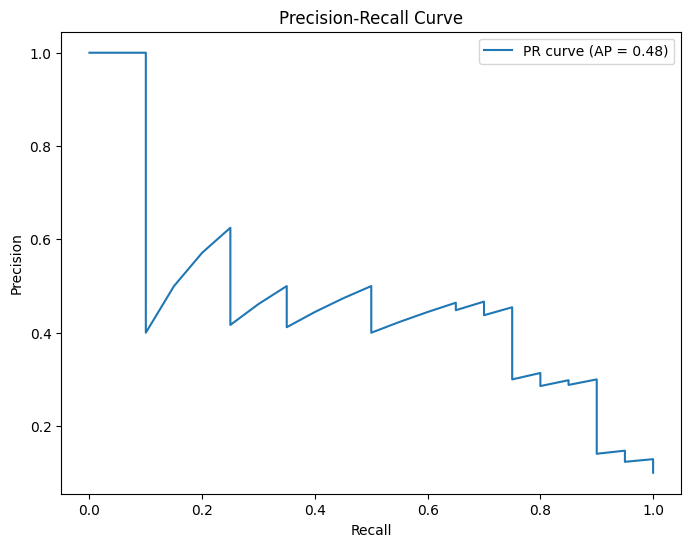

In [4]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# 生成一个二分类数据集
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.9, 0.1], random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建一个逻辑回归模型
model = LogisticRegression()

# 训练模型
model.fit(X_train, y_train)

# 预测测试集的概率
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 计算Precision和Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# 计算平均精确率
average_precision = average_precision_score(y_test, y_pred_proba)
print(f"Average Precision: {average_precision:.2f}")

# 绘制PR曲线
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

In [2]:
import numpy as np
from sklearn import metrics

##给定的真实y 和 预测pred
y    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])
pred = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.53, 0.52, 0.51, 0.505,0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.3, 0.1])

numerator = 0    #分子
denominator = 0  #分母

for i in range(0, len(y)-1):
    for j in range(i, len(y)):
        if y[i] != y[j]:
            denominator += 1
            #统计所有正负样本对中，模型把相对位置排序正确的数量
            if(y[i]>y[j] and pred[i]>pred[j]) or (y[i]<y[j] and pred[i]<pred[j]):
                numerator += 1

print("AUC =" , numerator/denominator)

AUC = 0.68


In [3]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=1)
print(metrics.auc(fpr, tpr))

0.6799999999999999


In [1]:
import numpy as np
from sklearn import metrics

##给定的真实y 和 预测pred
y    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0])
pred = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.54, 0.54, 0.51, 0.505])

numerator = 0    #分子
denominator = 0  #分母

for i in range(0, len(y)-1):
    for j in range(i, len(y)):
        if y[i] != y[j]:
            denominator += 1
            #统计所有正负样本对中，模型把相对位置排序正确的数量
            if(y[i]>y[j] and pred[i]>pred[j]) or (y[i]<y[j] and pred[i]<pred[j]):
                numerator += 1

print("AUC =" , numerator/denominator)

AUC = 0.6666666666666666


## scikit-learn的实现

In [4]:
from sklearn import metrics
y    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0])
pred = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.54, 0.54, 0.51, 0.505])
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=1)
print(metrics.auc(fpr, tpr))

0.7083333333333333


In [3]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


def auc_calculate(labels,preds,n_bins=100):
    postive_len = sum(labels)   #正样本数量（因为正样本都是1）
    negative_len = len(labels) - postive_len #负样本数量
    total_case = postive_len * negative_len #正负样本对
    pos_histogram = [0 for _ in range(n_bins)] 
    neg_histogram = [0 for _ in range(n_bins)]
    bin_width = 1.0 / n_bins
    for i in range(len(labels)):
        nth_bin = int(preds[i]/bin_width)
        if labels[i]==1:
            pos_histogram[nth_bin] += 1
        else:
            neg_histogram[nth_bin] += 1
    accumulated_neg = 0
    satisfied_pair = 0
    for i in range(n_bins):
        satisfied_pair += (pos_histogram[i]*accumulated_neg + pos_histogram[i]*neg_histogram[i]*0.5)
        accumulated_neg += neg_histogram[i]
    return satisfied_pair / float(total_case)

if __name__ == '__main__':
    y    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0])
    pred = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.54, 0.54, 0.51, 0.505])

    fpr, tpr, thresholds = roc_curve(y, pred, pos_label=1)
    print("sklearn:",auc(fpr, tpr))
    print("验证:",auc_calculate(y,pred))

sklearn: 0.7083333333333333
验证: 0.7083333333333334


In [1]:
import numpy as np

def compute_auc(y_true, y_scores):
    """
    根据ROC曲线下的面积计算AUC
    :param y_true: 真实标签 (list or numpy array)
    :param y_scores: 预测分数 (list or numpy array)
    :return: AUC 值
    """
    # 确保数据是 numpy 数组
    y_true = np.array(y_true)
    y_scores = np.array(y_scores)
    
    # 按预测分数降序排序
    sorted_indices = np.argsort(-y_scores)
    y_true = y_true[sorted_indices]
    y_scores = y_scores[sorted_indices]
    
    # 初始化
    tp = 0
    fp = 0
    tps = []  # 累计的TPR
    fps = []  # 累计的FPR
    pos_count = sum(y_true)  # 正样本总数
    neg_count = len(y_true) - pos_count  # 负样本总数

    # 遍历样本，计算TP和FP
    for i in range(len(y_true)):
        if y_true[i] == 1:
            tp += 1
        else:
            fp += 1
        tps.append(tp / pos_count)  # 计算TPR
        fps.append(fp / neg_count)  # 计算FPR

    # 计算AUC，梯形面积
    auc = 0.0
    for i in range(1, len(fps)):
        auc += (fps[i] - fps[i-1]) * (tps[i] + tps[i-1]) / 2  # 梯形面积公式

    return auc


# 示例数据
y_true = [1, 0, 1, 1, 0, 1, 0]  # 真实标签
y_scores = [0.9, 0.1, 0.8, 0.7, 0.3, 0.6, 0.2]  # 模型预测的概率

# 计算AUC
auc_value = compute_auc(y_true, y_scores)
print(f"AUC 值: {auc_value:.4f}")


AUC 值: 1.0000


In [2]:
y_1    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])
pred_1 = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.53, 0.52, 0.51, 0.505,0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.3, 0.1])
# 计算AUC
auc_value = compute_auc(y_1, pred_1)
print(f"AUC 值: {auc_value:.4f}")


AUC 值: 0.6800


In [3]:
y_2    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0])
pred_2 = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.54, 0.54, 0.51, 0.505])
auc_value = compute_auc(y_2, pred_2)
print(f"AUC 值: {auc_value:.4f}")

AUC 值: 0.7500


C:\Users\TH\AppData\Local\Temp\ipykernel_16720\3489440758.py:31: RuntimeWarning: invalid value encountered in scalar divide
  FP_rate = FP / (num-sum(labels))
C:\Users\TH\AppData\Local\Temp\ipykernel_16720\3489440758.py:31: RuntimeWarning: divide by zero encountered in scalar divide
  FP_rate = FP / (num-sum(labels))


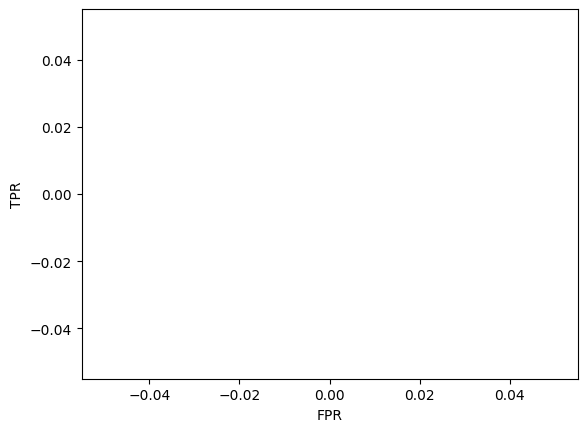

方法一 auc: nan


C:\Users\TH\AppData\Local\Temp\ipykernel_16720\3489440758.py:44: RuntimeWarning: invalid value encountered in scalar subtract
  auc1 += (x-lastx)*y  # 底乘高


In [9]:
import numpy as np
import matplotlib.pyplot as plt

labels    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0])
pred_prob = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.54, 0.54, 0.51, 0.505])

labels    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])
pred_prob = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.53, 0.52, 0.51, 0.505,0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.3, 0.1])


num = 10
roc_point = []
for i in range(num):
    i = pred_prob[i]
    TP = 0  # 真阳样本数
    FP = 0  # 假阳样本数
    TP_rate = 0.  # 真阳率
    FP_rate = 0.  # 假阳率
    pos_num = 0   # 预测真样本数

    # 计数过程
    for ind, prob in enumerate(pred_prob):
        if prob>i:
            pos_num += 1
        if prob>i and labels[ind]>0.5:
            TP+=1
        elif prob>i and labels[ind]<0.5:
            FP+=1
    if pos_num!=0:
        TP_rate = TP / sum(labels)
        FP_rate = FP / (num-sum(labels))
    roc_point.append([FP_rate, TP_rate])  # 记录ROC中的点
# 画出ROC曲线
roc_point.sort(key=lambda x: x[0])
plt.plot(np.array(roc_point)[1:, 0], np.array(roc_point)[1: ,1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# 计算每个小长方形的面积，求和即为auc
auc1 = 0
lastx = 0.
for x,y in roc_point:
    auc1 += (x-lastx)*y  # 底乘高
    lastx = x

print("方法一 auc:", auc1)

In [11]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


def auc_calculate(labels,preds,n_bins=100):
    postive_len = sum(labels)   #正样本数量（因为正样本都是1）
    negative_len = len(labels) - postive_len #负样本数量
    total_case = postive_len * negative_len #正负样本对
    pos_histogram = [0 for _ in range(n_bins)] 
    neg_histogram = [0 for _ in range(n_bins)]
    bin_width = 1.0 / n_bins
    for i in range(len(labels)):
        nth_bin = int(preds[i]/bin_width)
        if labels[i]==1:
            pos_histogram[nth_bin] += 1
        else:
            neg_histogram[nth_bin] += 1
    accumulated_neg = 0
    satisfied_pair = 0
    for i in range(n_bins):
        satisfied_pair += (pos_histogram[i]*accumulated_neg + pos_histogram[i]*neg_histogram[i]*0.5)
        accumulated_neg += neg_histogram[i]
    return satisfied_pair / float(total_case)

if __name__ == '__main__':
    # y    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0])
    # pred = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.54, 0.54, 0.51, 0.505])
    
    y    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])
    pred = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.53, 0.52, 0.51, 0.505,0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.3, 0.1])


    fpr, tpr, thresholds = roc_curve(y, pred, pos_label=1)
    print("sklearn:",auc(fpr, tpr))
    print("验证:",auc_calculate(y,pred))

sklearn: 0.6799999999999999
验证: 0.68


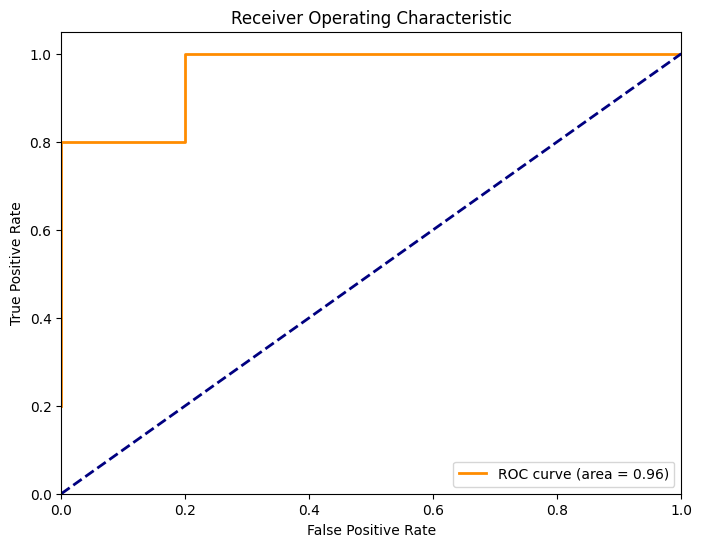

AUC: 0.9600000000000001


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_roc_auc(y_true, y_scores):
    # 计算所有可能的阈值
    thresholds = np.sort(y_scores)
    
    # 初始化累积的 TP 和 FP
    tp = np.cumsum(y_true)
    fp = np.cumsum(1 - y_true)

    # 计算所有阈值的 TPR 和 FPR
    tpr = tp / np.sum(y_true)
    fpr = fp / np.sum(1 - y_true)

    # 计算 AUC
    auc = np.trapz(tpr, fpr)
    
    # 绘制ROC曲线
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return auc, tpr, fpr

# AUC: 
# y_true    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])
# y_scores = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.53, 0.52, 0.51, 0.505,0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.3, 0.1])

y_true = np.array([1, 0, 1, 1, 0, 0, 1])
y_scores = np.array([0.9, 0.2, 0.8, 0.7, 0.3, 0.4, 0.4])

y_true = np.array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0])
y_scores = np.array([0.9, 0.8, 0.7, 0.6, 0.6, 0.4, 0.4, 0.3, 0.2, 0.1])


auc, tpr, fpr = calculate_roc_auc(y_true, y_scores)
print("AUC:", auc)


[0.         0.16666667 0.33333333 0.33333333 0.5        0.66666667
 0.83333333 0.83333333 0.83333333 1.         1.        ]


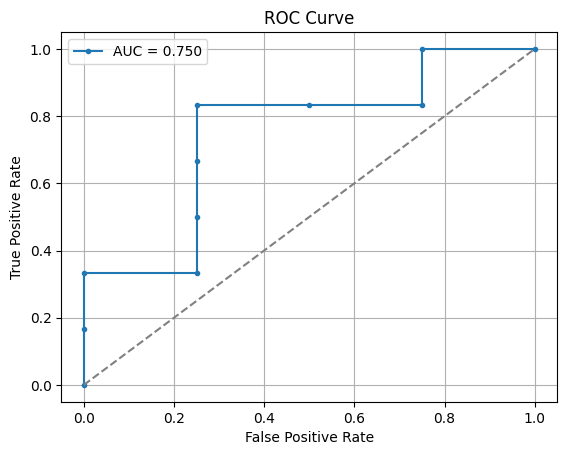

AUC: 0.750


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_roc_auc(y_true, y_scores):
    # 转换为numpy数组
    y_true = np.array(y_true)
    y_scores = np.array(y_scores)
    
    # 按预测得分降序排序
    sorted_indices = np.argsort(-y_scores)
    y_true_sorted = y_true[sorted_indices]
    y_scores_sorted = y_scores[sorted_indices]
    
    # 计算累积的真阳性和假阳性
    tp = np.cumsum(y_true_sorted)
    fp = np.cumsum(1 - y_true_sorted)
    
    # 计算总的正样本和负样本数
    total_pos = np.sum(y_true_sorted)
    total_neg = len(y_true_sorted) - total_pos
    
    # 计算TPR和FPR
    tpr = tp / total_pos if total_pos != 0 else np.zeros_like(tp)
    fpr = fp / total_neg if total_neg != 0 else np.zeros_like(fp)
    
    # 在曲线起点添加(0,0)
    tpr = np.concatenate([[0], tpr])
    fpr = np.concatenate([[0], fpr])

    print(tpr)
    # 计算AUC
    auc = np.trapz(tpr, fpr)
    
    # 绘制ROC曲线
    plt.figure()
    plt.plot(fpr, tpr, marker='.', label=f'AUC = {auc:.3f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # 随机猜测的对角线
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return auc

# 示例用法
if __name__ == "__main__":
    y_true    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])
    y_scores = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.53, 0.52, 0.51, 0.505,0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.3, 0.1])
    
    y_true = np.array([1, 0, 1, 1, 0, 0, 1])
    y_scores = np.array([0.9, 0.2, 0.8, 0.7, 0.3, 0.4, 0.4])

    y_true    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0])
    y_scores = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.54, 0.54, 0.51, 0.505])

    auc_value = calculate_roc_auc(y_true, y_scores)
    print(f"AUC: {auc_value:.3f}")


In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_auc_sk(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)

    # auc = np.trapz(tpr, fpr)

    roc_auc = auc(fpr, tpr)
    
    # 绘制ROC曲线
    plt.figure()
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # 随机猜测的对角线
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (scikit-learn)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return roc_auc

# 示例用法
if __name__ == "__main__":
    y_true = np.array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0])
    y_scores = np.array([0.9, 0.8, 0.7, 0.6, 0.6, 0.4, 0.4, 0.3, 0.2, 0.1])

    y_true    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0])
    y_scores = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.54, 0.54, 0.51, 0.505])
    
    auc_value = plot_roc_auc_sk(y_true, y_scores)
    print(f"scikit-learn AUC: {auc_value:.3f}")


NameError: name 'roc_auc' is not defined

<Figure size 640x480 with 0 Axes>

[0.6        0.75       0.66666667 1.         1.         1.        ]
[1.         1.         0.66666667 0.66666667 0.33333333 0.        ]
[0.5 0.6 0.7 0.8 0.9]
Average precision:0.92


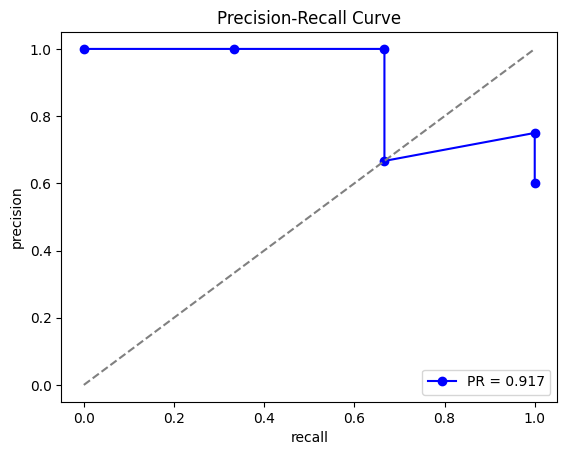

In [5]:
import numpy as np
from sklearn.metrics import precision_recall_curve,average_precision_score
import matplotlib.pylab as plt

y_test = np.array([1, 1, 0, 1, 0])
y_pred_proba = np.array([0.9, 0.8, 0.7, 0.6, 0.5])

# 计算Precision 和Recall
precision,recall,thresholds = precision_recall_curve(y_test,y_pred_proba)

print(precision)
print(recall)
print(thresholds)

# 计算平均精确率
average_precision = average_precision_score(y_test,y_pred_proba)
print(f"Average precision:{average_precision:.2f}")

# 绘制P-R曲线
plt.figure()
plt.plot(recall, precision, marker='o', color='blue',label=f'PR = {average_precision:.3f}')
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # 随机猜测的对角线
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

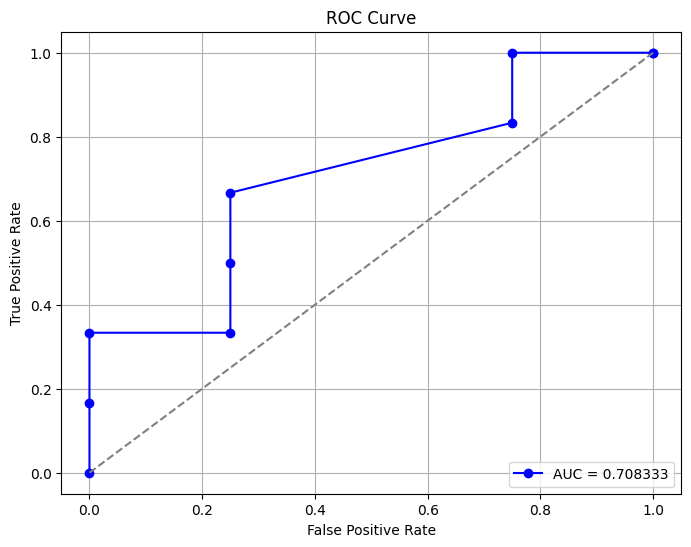

0.7083333333333333


In [12]:
import numpy as np
import matplotlib.pyplot as plt


# 重新计算AUC，并准备绘制ROC曲线
def auc_calculate_area(y,pred):
    # 初始化ROC曲线上的点（0，0）
    tpr_list = [0]
    fpr_list = [0]
    
    # 预测值pred的降序排序
    thresholds = np.unique(pred)[::-1]

    # 计算每个阈值的TPR和FPR
    for threshold in thresholds:
        # 预测标签,统计每一个截断点下,正样本的标签。如：
        # 当threshold=0.9的，只有第1个样本预测为正.
        # 当threshold=0.8的，只有第1,2个样本预测为正。
        # 当threshold=0.7的，只有第1,2,3个样本预测为正。
        # 当threshold=0.505的，所有的样本预测为正。
        pred_label = (pred >= threshold).astype(int)
        
        # 计算TP, FP, TN, FN
        TP = np.sum((pred_label == 1) & (y == 1))
        FP = np.sum((pred_label == 1) & (y == 0))
        TN = np.sum((pred_label == 0) & (y == 0))
        FN = np.sum((pred_label == 0) & (y == 1))
    
        # 计算TPR和FPR,防止分母为0
        TPR = TP / (TP + FN) if (TP + FN) != 0 else 0
        FPR = FP / (FP + TN) if (FP + TN) != 0 else 0
        
        # 添加到列表中
        tpr_list.append(TPR)
        fpr_list.append(FPR)

    # 添加ROC曲线的终点
    tpr_list.append(1)
    fpr_list.append(1)
    
    # 使用梯形法则计算AUC
    auc = 0
    for i in range(1, len(fpr_list)):
        auc += 0.5 * (fpr_list[i] - fpr_list[i-1]) * (tpr_list[i] + tpr_list[i-1])
    
    # 绘制ROC曲线
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_list, tpr_list, marker = 'o',color='blue', label=f'AUC = {auc:.6f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.savefig('27.png')
    plt.show()
    
    return auc

y    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0])
pred = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.54, 0.54, 0.51, 0.505])
auc =  auc_calculate_area(y,pred)
print(auc)

In [16]:
import numpy as np
import matplotlib.pyplot as plt


def cal_auc_sort(label,preds):
    # 获取正负样本的标签序号，从0开始
    pos_indices= [i for i in range(len(label)) if label[i] == 1]
    neg_indices= [i for i in range(len(label)) if label[i] == 0]

    total_num = len(pos_indices) * len(neg_indices)

    # 初始化为0
    pos_gt_neg_num = 0

    # 循环判断
    for i in pos_indices:
        for j in neg_indices:
            # 值比较，小于的情况就不用累加了
            if preds[i] > preds[j]:
                pos_gt_neg_num += 1
            elif preds[i] == preds[j]:
                pos_gt_neg_num += 0.5
    if not pos_indices or not neg_indices:
        return None
    return f"{(pos_gt_neg_num / (total_num)):.3f}"
    
lable    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0])
preds = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.54, 0.54, 0.51, 0.505])
auc =  cal_auc_sort(lable,preds)
print(auc)

0.708


In [3]:
import numpy as np

def cal_auc_by_rk(labels,predictions):
    """
    label:list,二元标签
    predictions:list,模型的预测得分
    auc_value:float，AUC值
    """

    # 结合预测值和标签，按预测值排序
    combined_data = sorted(zip(predictions,labels),key=lambda x:x[0])
    # 构建一个字典，存储相同预测值的所有样本的位置索引
    score_indices = {prediction: [] for prediction, _ in combined_data}
    for index,(prediction, _) in enumerate(combined_data):
        score_indices[prediction].append(index + 1)

    # 计算正例的平均排名
    positive_rank_sum = 0.0
    for index, (_, label) in enumerate(combined_data):
        if label == 1: # 正例
            prediction = combined_data[index][0]
            average_position = sum(score_indices[prediction]) / len(score_indices[prediction])
            positive_rank_sum += average_position
            
    # 统计正例和负例的个数
    num_positives = sum(labels)
    num_negatives = len(labels) - num_positives

    # 检查是否同时存在正例和负例，数据集中不存在两种类型的数据的时候，无法计算AUC
    if num_positives == 0 or num_negatives == 0:
        return None
        
    # 使用公式法计算AUC
    auc_value = (positive_rank_sum-(num_positives * (num_positives + 1) *0.5)) / (num_positives * num_negatives)
    return auc_value

labels    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0])
predictions = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.54, 0.54, 0.51, 0.505])
auc =  cal_auc_by_rk(labels,predictions)
print(auc)    

0.7083333333333334


In [4]:
from sklearn import metrics
import numpy as np

labels    = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0])
predictions = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.54, 0.54, 0.51, 0.505])

fpr,tpr,thresholds = metrics.roc_curve(labels,predictions)
auc = metrics.auc(fpr,tpr)

print(fpr)
print(tpr)
print(thresholds)

# 最优的阈值
good_threshold = thresholds[np.argmax(tpr-fpr)]

# 坐标值
x_fpr = fpr[np.argmax(tpr-fpr)]
y_tpr = tpr[np.argmax(tpr-fpr)]

print(auc)
print([x_fpr,y_tpr])
print(good_threshold)

[0.   0.   0.   0.25 0.25 0.75 0.75 1.  ]
[0.         0.16666667 0.33333333 0.33333333 0.66666667 0.83333333
 1.         1.        ]
[  inf 0.9   0.8   0.7   0.55  0.54  0.51  0.505]
0.7083333333333333
[0.25, 0.6666666666666666]
0.55
